In [1]:
import random
import numpy as np

### サンプルデータの前処理

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data['data'].shape, data['target'].shape

((150, 4), (150,))

In [4]:
n_class = len(np.unique(data['target']))
n_class

3

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(data['data'])

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6, 4)
plt.scatter(X[:, 0], X[:, 2], c=data['target'])
plt.show()

<Figure size 600x400 with 1 Axes>

In [7]:
n = len(X)

### パラメタ の初期値を作成

In [8]:
# initialize mu_k by randomly selected data points
pi = np.array([1/n_class]*n_class)
mu = X[random.sample(list(range(n)), n_class)]
cov = np.array([np.cov(X, rowvar=False)] * n_class)

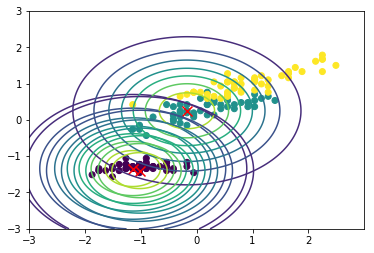

In [9]:
matplotlib.rcParams['figure.figsize'] = (6, 4)
ax = 0
ay = 2
plt.scatter(X[:, ax], X[:, ay], c=data['target'])
plt.scatter(mu[:, ax],mu[:, ay], c='r', marker='x', s=100)

from scipy.stats import multivariate_normal
for k in range(n_class):
    rv = multivariate_normal(mu[k, [ax, ay]], cov[k, [ax, ay], [ax, ay]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.contour(x, y, rv.pdf(pos))

plt.show()

In [10]:
j = 0
mn_list = [multivariate_normal(mu[k], cov[k]) for k in range(n_class)]
for i in range(n):
    jk = 0
    for k in range(n_class):
        jk += pi[k] * mn_list[k].pdf(X[i])
    j += np.log(jk)
print(j)

-574.7080035788691


### Eステップ 負担率 rnk の計算

In [11]:
# E step calc rnk
rnk = np.zeros(shape=(n, n_class))
for i in range(n):
    norm_const = 0
    for k in range(n_class):
        norm_const += pi[k] * multivariate_normal(mu[k], cov[k]).pdf(X[i])
    for k in range(n_class):
        rnk[i, k] = pi[k] * multivariate_normal(mu[k], cov[k]).pdf(X[i]) / norm_const    

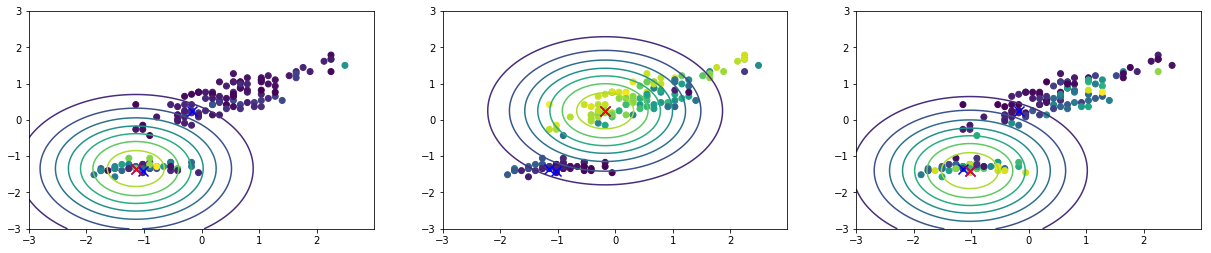

In [12]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (21, 4)
for k in range(n_class):
    plt.subplot(1, n_class, k+1)
    plt.scatter(X[:, ax], X[:, ay], c=rnk[:, k])
    plt.scatter(mu[:, ax], mu[:, ay], c='b', marker='x', s=100)
    plt.scatter(mu[k, ax], mu[k, ay], c='r', marker='x', s=100)
    
    rv = multivariate_normal(mu[k, [ax, ay]], cov[k, [ax, ay], [ax, ay]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.contour(x, y, rv.pdf(pos))

### Mステップ

##### Nk, πk の計算

In [13]:
nk = np.sum(rnk, axis=0)

In [14]:
pi = nk / n

##### μk の計算

In [15]:
for k in range(n_class):
    mu[k] = np.sum(rnk[:, k].reshape(n, 1) * X, axis=0) / nk[k]

##### cov の計算

In [16]:
for k in range(n_class):
    cov[k] = (X - mu[k]).T.dot(np.diag(rnk[:, k])).dot(X - mu[k]) / nk[k]

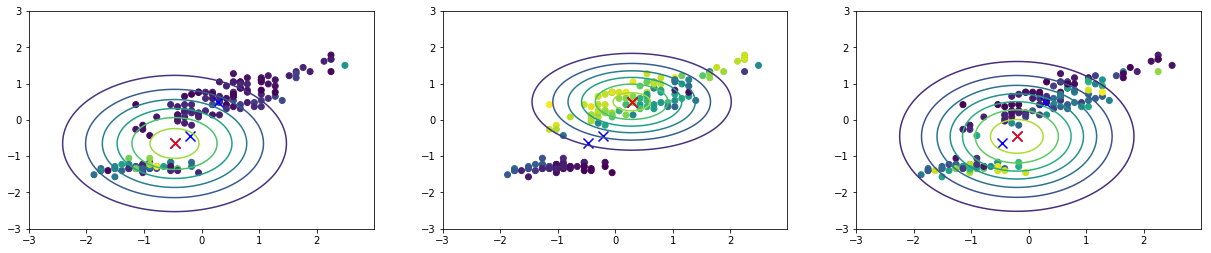

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (21, 4)
for k in range(n_class):
    plt.subplot(1, n_class, k+1)
    plt.scatter(X[:, ax], X[:, ay], c=rnk[:, k])
    plt.scatter(mu[:, ax], mu[:, ay], c='b', marker='x', s=100)
    plt.scatter(mu[k, ax], mu[k, ay], c='r', marker='x', s=100)
    
    rv = multivariate_normal(mu[k, [ax, ay]], cov[k, [ax, ay], [ax, ay]])
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    plt.contour(x, y, rv.pdf(pos))

### 誤差関数の計算

In [18]:
j = 0
mn_list = [multivariate_normal(mu[k], cov[k]) for k in range(n_class)]
for i in range(n):
    jk = 0
    for k in range(n_class):
        jk += pi[k] * mn_list[k].pdf(X[i])
    j += np.log(jk)
print(j)

-457.85225140339367
